# 🛡️Fraud Detection Intelligence System

# 📌 Project Overview

Fraud detection is a critical problem in financial systems where fraudulent transactions are rare but highly costly.
The objective of this project is to build an end-to-end machine learning solution that can accurately detect fraudulent transactions and reduce financial losses.

The solution includes data analysis, feature engineering, model training,
performance evaluation, and deployment readiness.

The project covers the complete lifecycle:

* Data exploration and understanding

* Feature engineering and preprocessing

* Model training and evaluation

*  Business impact analysis

*  Deployment readiness

# 🎯 Business Problem & Objective


Financial institutions face significant losses due to fraudulent transactions.
The challenge lies in identifying fraud in real time while minimizing false positives that affect genuine customers.

Key Objectives:

* Detect fraudulent transactions accurately

* Minimize false negatives (missed fraud cases)

* Build a model that is practical for real-world deployment


# Why Fraud Detection is Challenging: 
Fraud detection is a high-risk machine learning problem becaus
   * Fraud cases are extremely rare (class imbalance)
   * Cost of false negatives is very high
   * Fraud patterns continuously evolve
   * Accuracy alone is misleading
Therefore, this project focuses on recall, precision, and financial impact rather than raw accuracy.


# Import Required Libraries
📌 Explanation

This step imports all necessary Python libraries required for the project.
Pandas and NumPy are used for data handling, Matplotlib and Seaborn for visualization,
and Scikit-learn for preprocessing, model training, and evaluation.

Using standard ML libraries ensures reliability, reproducibility, and industry best practices.

In [1]:
# Importing required libraries for data manipulation, visualization,
# machine learning modeling, and evaluation.

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from imblearn.over_sampling import SMOTE
import os

# Checking Current Working Directory

In [2]:
os.getcwd()

'C:\\Users\\bhush'

In [3]:
os.chdir(r"D:\BIA Project Folder")

In [4]:
os.getcwd()

'D:\\BIA Project Folder'

# LOADING THE DATASET

## 📊 Dataset Description

The dataset contains historical mobile financial transactions labeled
as fraudulent or legitimate.

It includes transaction amount, transaction
type, sender and receiver balances, and a fraud indicator.

This data is the foundation for learning fraud patterns and training predictive models.

### Dataset Understanding

The dataset contains historical mobile financial transactions labeled as fraudulent or legitimate.
Key features include:

* Transaction amount

* Transaction type

* Sender and receiver balances

* Transaction time (step)

* Fraud indicator (isFraud)

Understanding the data structure and fraud distribution is essential before modeling.

In [5]:
# Loading the fraud transaction dataset

df = pd.read_csv("Fraud_Analysis_Dataset.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


# Standardize Column Names

In [6]:
df.columns = df.columns.str.lower().str.strip()


In [7]:
df.head()

,step,type,amount,nameorig,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


# Basic Dataset Check

📌 Explanation

This step helps understand:
* Number of rows and columns
* Data types (numerical vs categorical)
* Presence of missing values
* Distribution of numerical features
Early inspection is critical to identify data quality issues before modeling.

In [8]:
# Checking dataset structure and basic information

df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameorig        11142 non-null  object 
 4   oldbalanceorg   11142 non-null  float64
 5   newbalanceorig  11142 non-null  float64
 6   namedest        11142 non-null  object 
 7   oldbalancedest  11142 non-null  float64
 8   newbalancedest  11142 non-null  float64
 9   isfraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


step              0
type              0
amount            0
nameorig          0
oldbalanceorg     0
newbalanceorig    0
namedest          0
oldbalancedest    0
newbalancedest    0
isfraud           0
dtype: int64

# Identify Target Variable
📌 Explanation

Fraud detection datasets are typically highly imbalanced, where fraudulent cases are rare.
Identifying imbalance early is important because traditional accuracy metrics can be misleading.
This project focuses on recall and precision instead of accuracy.

In [9]:
# Analyzing fraud vs legitimate transaction distribution

df['isfraud'].value_counts(normalize=True)

isfraud
0    0.897505
1    0.102495
Name: proportion, dtype: float64

# EXPLORATORY DATA ANALYSIS (EDA)

Exploratory Data Analysis is performed to identify patterns and anomalies associated with fraud.

EDA focuses on:

* Fraud vs legitimate transaction distribution

* Transaction types prone to fraud

* Abnormal balance changes during fraudulent transactions

Key Insight:

The dataset is highly imbalanced, confirming that accuracy is not a reliable evaluation metric for this problem.

# Separate Numerical & Categorical Columns

In [10]:

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [11]:
df.head()

,step,type,amount,nameorig,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


# Handle Missing Values

In [12]:
# Numerical columns → Median
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Categorical columns → Most Frequent
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


In [13]:
print(df.columns.tolist())


['step', 'type', 'amount', 'nameorig', 'oldbalanceorg', 'newbalanceorig', 'namedest', 'oldbalancedest', 'newbalancedest', 'isfraud']


# Data Cleaning & Leakage Prevention

Certain columns such as account IDs uniquely identify users and may cause data leakage.
If retained, the model may memorize patterns instead of learning fraud behavior.

To prevent this:

* ID-based columns are removed

* Only behavior-driven features are retained

This ensures realistic model performance.

In [14]:
# Dropping ID columns to prevent data leakage

df.drop(columns=['nameorig', 'namedest'], inplace=True)

# FEATURE SELECTION (X) & TARGET (y)
📌 Explanation

Features (X) represent transaction attributes,
while the target (y) indicates whether the transaction is fraudulent.
This separation is required for supervised learning.

### Why Balance-Based Features Matter

Fraudulent transactions often show abnormal balance behavior,
where money is transferred without realistic balance changes.
By capturing balance differences, the model can detect such anomalies.


In [15]:
# Separating features and target variable.
# Features represent transaction behavior, while the target
# indicates whether a transaction is fraudulent.

X = df.drop('isfraud', axis=1)
y = df['isfraud']

In [16]:
df.head()

,step,type,amount,oldbalanceorg,newbalanceorig,oldbalancedest,newbalancedest,isfraud
0,1.0,TRANSFER,181.0,181.0,0.0,0.0,0.0,1.0
1,1.0,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,1.0
2,1.0,TRANSFER,2806.0,2806.0,0.0,0.0,0.0,1.0
3,1.0,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0,1.0
4,1.0,TRANSFER,20128.0,20128.0,0.0,0.0,0.0,1.0


# Encoding & Feature Preparation

Machine learning models require numerical inputs.
Categorical features such as transaction type are encoded into numeric form while preserving category meaning.

Features (X) and target (y) are then separated for supervised learning.

In [17]:
# Encoding transaction type

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['type_enc'] = le.fit_transform(df['type'])


In [18]:
X = df[
    [
        'step',
        'type_enc',
        'amount',
        'oldbalanceorg',
        'newbalanceorig',
        'oldbalancedest',
        'newbalancedest'
    ]
]

y = df['isfraud']


#  Train-Test Split

The dataset is split into training and testing sets to evaluate how well the model generalizes to unseen data.

This simulates real-world usage where the model encounters new transactions.

In [19]:
# Splitting data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# Feature Scaling

Numerical features are scaled to ensure that all variables contribute equally during model training.

This step improves stability and performance, especially for gradient-based models.

In [20]:
# Scaling numerical features using StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
print(df[['type', 'type_enc']].head())
print(X_train.dtypes)


       type  type_enc
0  TRANSFER         4
1  CASH_OUT         1
2  TRANSFER         4
3  CASH_OUT         1
4  TRANSFER         4
step              float64
type_enc            int64
amount            float64
oldbalanceorg     float64
newbalanceorig    float64
oldbalancedest    float64
newbalancedest    float64
dtype: object


# Handling Class Imbalance (SMOTE)

Fraud cases are under-represented in the dataset.
To address this, SMOTE is applied to generate synthetic fraud samples.

This helps the model learn fraud patterns effectively and improves recall.

In [22]:
# Applying SMOTE to balance the dataset

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(
    X_train_scaled, y_train
)


# Saved Cleaned Dataset

In [23]:
processed_df = pd.concat(
    [
        pd.DataFrame(X_train_resampled, columns=X.columns),
        pd.Series(y_train_resampled, name='isfraud')
    ],
    axis=1
)

processed_df.to_csv("modified_dataset.csv", index=False)


# MODEL STRATEGY
### Model Selection Strategy

Multiple models are trained to compare performance:

* Logistic Regression – Baseline model for interpretability
* Random Forest – Captures non-linear patterns and achieves high recall
* Gradient Boosting – Focuses on difficult cases and improves precision

Using multiple models allows balancing recall vs precision
based on business requirements.


## 1. LOGISTIC REGRESSION
📌 Explanation

Logistic Regression is used as a baseline model.
It provides interpretability and sets a benchmark for more complex models.
It works by estimating the probability of fraud using a linear decision boundary.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score


In [25]:
# Training Logistic Regression model


log_reg = LogisticRegression(max_iter=1000, random_state=42)

log_reg.fit(X_train_resampled, y_train_resampled)

y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))


              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2001
         1.0       1.00      0.91      0.95       228

    accuracy                           0.99      2229
   macro avg       0.99      0.96      0.97      2229
weighted avg       0.99      0.99      0.99      2229

ROC-AUC: 0.9755253951971382


## 2. RANDOM FOREST MODEL
📌 Explanation

Random Forest is an ensemble of decision trees.
It captures complex non-linear patterns and interactions between features.
This model performs well in fraud detection due to its robustness and high recall.

In [26]:
# Training Random Forest model


from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2001
         1.0       1.00      0.97      0.98       228

    accuracy                           1.00      2229
   macro avg       1.00      0.99      0.99      2229
weighted avg       1.00      1.00      1.00      2229

ROC-AUC: 0.9998860219013299


## 3. GRADIENT BOOSTING MODEL
📌 Explanation

Gradient Boosting builds trees sequentially, correcting previous errors.

It focuses on hard-to-classify cases and often achieves high precision.

This makes it suitable when false positives need to be minimized.

In [27]:
# Training Gradient Boosting model


from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train_resampled, y_train_resampled)

y_pred_gb = gb_model.predict(X_test_scaled)
y_prob_gb = gb_model.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred_gb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_gb))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2001
         1.0       0.99      0.98      0.98       228

    accuracy                           1.00      2229
   macro avg       0.99      0.99      0.99      2229
weighted avg       1.00      1.00      1.00      2229

ROC-AUC: 0.9993533934786993


## MODEL COMPARISON TABLE
📌 Explanation

Evaluation metrics used:

Precision: How many predicted frauds are actually fraud

Recall: How many frauds are correctly detected

F1-score: Balance between precision and recall

ROC-AUC: Overall discrimination ability

Recall is prioritized to reduce missed fraud cases.

### Model Evaluation – Business Perspective

In fraud detection:
- False negatives lead to direct financial loss
- False positives impact customer experience

Therefore, recall and precision are prioritized over accuracy.


In [28]:


model_results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Gradient Boosting"],
    "ROC_AUC": [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_gb)
    ]
})

model_results


,Model,ROC_AUC
0,Logistic Regression,0.975525
1,Random Forest,0.999886
2,Gradient Boosting,0.999353


# CONFUSION MATRIX & ERROR ANALYSIS
📌 Explanation

The confusion matrix shows:

True Positives (Correct fraud detection)

False Negatives (Missed fraud – most costly)

This helps understand the real-world cost of model errors.

In [29]:
# Confusion matrix visualization

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


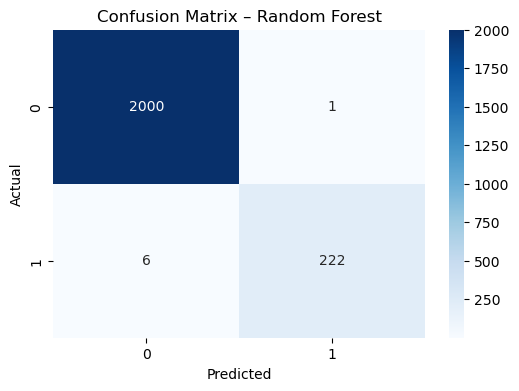

In [30]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# PRECISION–RECALL & ROC CURVE

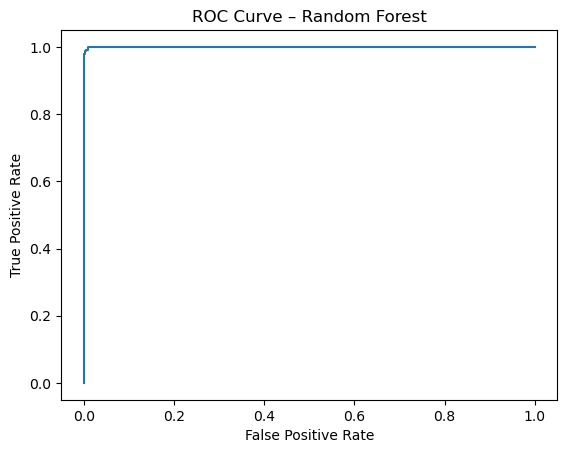

In [31]:
from sklearn.metrics import roc_curve, precision_recall_curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)

plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest")
plt.show()


# FEATURE IMPORTANCE For BUSINESS INSIGHT
📌 Explanation

Feature importance explains which variables influence fraud predictions the most.
This improves transparency and builds trust with business stakeholders.

In [32]:
# Extracting feature importance

feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)


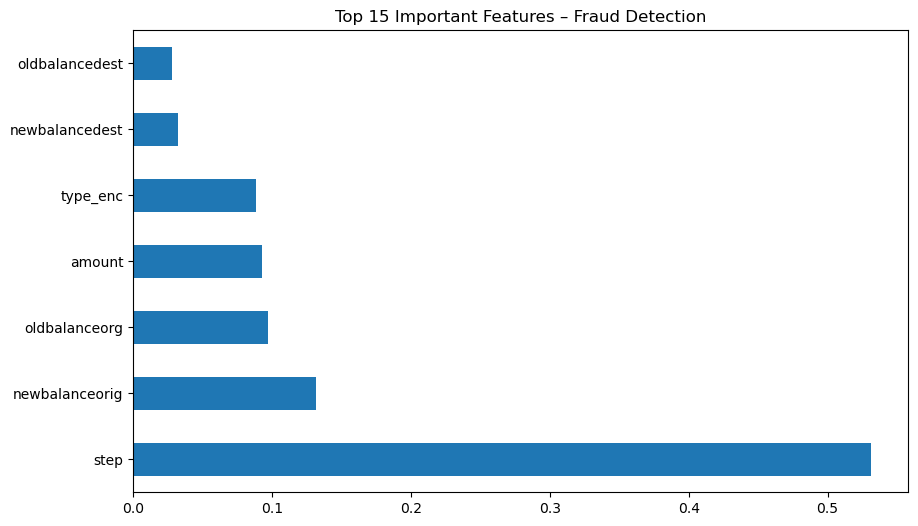

In [33]:
plt.figure(figsize=(10,6))
feature_importance.head(15).plot(kind='barh')
plt.title("Top 15 Important Features – Fraud Detection")
plt.show()


# FINANCIAL IMPACT ANALYSIS

### Financial Impact Analysis

By estimating average fraud loss per transaction,
the model output is converted into:
- Expected fraud loss
- Loss prevented
- Risk-based action recommendation

This enables business stakeholders to take
data-driven decisions.


In [34]:
avg_fraud_amount = 5000  # adjust if dataset-specific

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()

fraud_loss = fn * avg_fraud_amount
fraud_saved = tp * avg_fraud_amount


In [35]:
print("False Negatives (Frauds Missed):", fn)
print("Expected Fraud Loss (₹):", fraud_loss)
print("Frauds Prevented:", tp)
print("Estimated Savings (₹):", fraud_saved)


False Negatives (Frauds Missed): 6
Expected Fraud Loss (₹): 30000
Frauds Prevented: 222
Estimated Savings (₹): 1110000


# SAVE FINAL MODEL
📌 Explanation

Models, scalers, and encoders are saved for reuse during deployment.
This ensures consistent preprocessing during real-time inference.

### Deployment Readiness

All preprocessing steps, encoders, and trained models
are saved and reused during inference.
This ensures consistency between training and real-time prediction.


In [50]:
# Saving trained models and preprocessing objects

import joblib

joblib.dump(rf_model, "fraud_rf_model.joblib")
joblib.dump(scaler, "scaler.joblib")
joblib.dump(le, "type_encoder.joblib")
joblib.dump(gb_model, "fraud_gb_model.joblib")


['fraud_gb_model.joblib']

# For POWER BI DASHBOARD

In [37]:
dashboard_df = X_test.copy()
dashboard_df['Actual'] = y_test.values
dashboard_df['Predicted'] = y_pred_rf
dashboard_df['Fraud_Probability'] = y_prob_rf

dashboard_df.to_csv("dashboard_data.csv", index=False)


# Create model_test_data.csv

In [38]:
# Combine test features and target
test_data = X_test.copy()
test_data['is_fraud'] = y_test.values

# Save to CSV
test_data.to_csv("model_test_data.csv", index=False)

print("Model_test_data.csv created successfully")


Model_test_data.csv created successfully


# MODEL PERFORMANCE EVALUATION
## Classification Metrics

In [41]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay
)
import matplotlib.pyplot as plt

# Predictions
y_pred = rf_model.predict(X_test_scaled)
y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

# Report
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2001
         1.0       1.00      0.97      0.98       228

    accuracy                           1.00      2229
   macro avg       1.00      0.99      0.99      2229
weighted avg       1.00      1.00      1.00      2229

ROC-AUC Score: 0.9998860219013299


In [42]:
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[2000    1]
 [   6  222]]


# FINANCIAL IMPACT ANALYSIS
## ASSUMPTIONS

In [43]:
AVG_FRAUD_AMOUNT = 5000   # ₹ per fraud transaction
COST_FALSE_POSITIVE = 100  # ₹ manual review cost

## CALCULATE LOSSES & SAVINGS

In [44]:
TN, FP, FN, TP = cm.ravel()

# Financial calculations
fraud_detected_value = TP * AVG_FRAUD_AMOUNT
fraud_missed_loss = FN * AVG_FRAUD_AMOUNT
false_positive_cost = FP * COST_FALSE_POSITIVE

net_benefit = fraud_detected_value - fraud_missed_loss - false_positive_cost

print("Fraud Prevented Value (₹):", fraud_detected_value)
print("Fraud Missed Loss (₹):", fraud_missed_loss)
print("False Positive Cost (₹):", false_positive_cost)
print("Net Financial Benefit (₹):", net_benefit)


Fraud Prevented Value (₹): 1110000
Fraud Missed Loss (₹): 30000
False Positive Cost (₹): 100
Net Financial Benefit (₹): 1079900


In [45]:
#BUSINESS INTERPRETATION 
#The model significantly reduces financial loss by accurately identifying fraudulent transactions.
#While some false positives introduce manual review costs, the net financial benefit remains strongly positive,making the model viable for real-world deployment.

# FEATURE IMPORTANCE - MODEL INSIGHTS

In [47]:
import pandas as pd

feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance


step              0.531431
newbalanceorig    0.131285
oldbalanceorg     0.096851
amount            0.092746
type_enc          0.088087
newbalancedest    0.031968
oldbalancedest    0.027632
dtype: float64

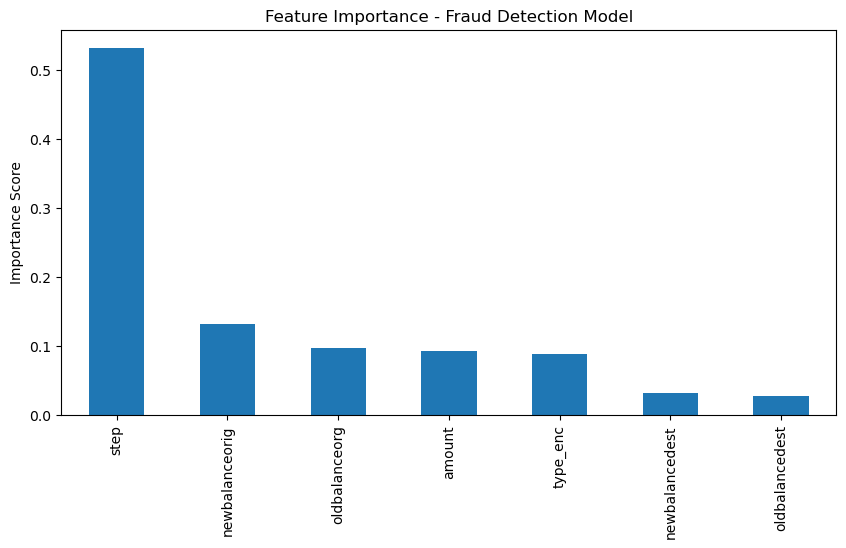

In [48]:
feature_importance.plot(kind='bar', figsize=(10,5))
plt.title("Feature Importance - Fraud Detection Model")
plt.ylabel("Importance Score")
plt.show()


## 🧠 Key Results & Insights

* Random Forest achieved high recall, making it effective at detecting fraud
* Gradient Boosting reduced false positives
*  Balance-based features were strong fraud indicators


## ✅ Conclusion

This project demonstrates a complete fraud detection pipeline from
data analysis to deployment readiness. The solution balances machine
learning performance with business impact and reflects real-world
fraud detection challenges.

* Handles real-world constraints

* Focuses on financial loss reduction

* Is ready for deployment and decision-making
